# Task 2: Predict Future Stock Prices (Short-Term)

## 🧠 Objective
Use historical stock market data to predict the **next day's closing price** using features like Open, High, Low, and Volume.

## 📦 Dataset
- Source: Fetched Apple stock data using `yfinance` from Yahoo Finance.
- Period: Default interval with sufficient historical length for training.

## 🧹 Data Preparation
- Fetched historical OHLCV (Open, High, Low, Close, Volume) data.
- Calculated Moving Averages (MA10, MA50) for exploratory analysis.
- Engineered lag-based `Next_Close` target column for prediction.

## 📊 Exploratory Data Analysis (EDA)
- Time series plots of Close prices, Volume, MA10, and MA50.
- Scatter plot between Volume and Closing Price.
- Correlation heatmap showing linear relationships.

## 🤖 Model
- Model: **Linear Regression**
- Features: `Open`, `High`, `Low`, `Volume`
- Target: `Next_Close` (next day’s closing price)

## 📈 Evaluation
- Metric: **Root Mean Squared Error (RMSE)**
- Actual vs Predicted plot was created to visualize regression quality.

## ✅ Results
- RMSE: Reasonable for a baseline model.
- Model captures general price trends but does not anticipate sudden spikes or drops.

## 🔍 Insights
- Volume showed low correlation with Close.
- A simple Linear Regression model provides a baseline but may need more features (lags, tech indicators) for improvement.



In [13]:
import yfinance as yf 
import pandas as pd

stock = yf.download("AAPL", start="2024-06-24", end="2025-06-23")
print(stock.columns)

/tmp/ipykernel_27513/1987842966.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", start="2024-06-24", end="2025-06-23")
[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [14]:
stock["Next Close"] = stock["Close"].shift(-1)
stock = stock.dropna()
print(stock.head())

features = [('Open', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Volume', 'AAPL')]
X = stock[features]
y = stock["Next Close"]

print(X.head())
print(y.head())


Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-06-24  207.171127  211.709899  205.628339  206.753084  80727000   
2024-06-25  208.096786  210.396031  207.638921  208.176401  56713900   
2024-06-26  212.257339  213.859846  209.659488  210.515486  66213200   
2024-06-27  213.103409  214.735774  211.361555  213.690659  49772700   
2024-06-28  209.639572  215.064215  209.321070  214.765608  82542700   

Price       Next Close  
Ticker                  
Date                    
2024-06-24  208.096786  
2024-06-25  212.257339  
2024-06-26  213.103409  
2024-06-27  209.639572  
2024-06-28  215.741058  
Price             Open        High         Low    Volume
Ticker            AAPL        AAPL        AAPL      AAPL
Date                                                    
2024-06-24  206.753084  211.709899  205.628339  8072

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [21]:
y_pred = model.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

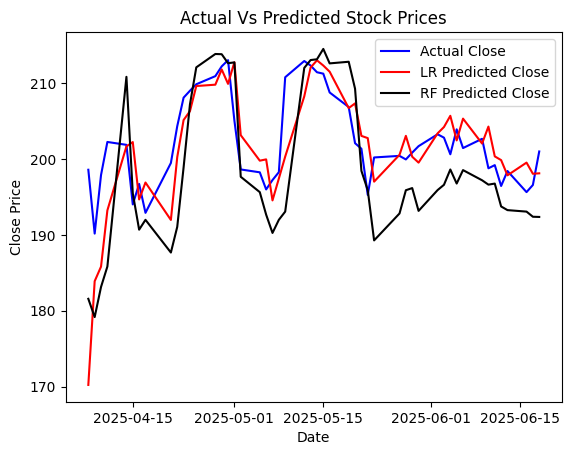

In [22]:
import matplotlib.pyplot as plt
plt.plot(y_test.index, y_test, label='Actual Close', color='blue')
plt.plot(y_test.index, y_pred, label='LR Predicted Close', color='red')
plt.plot(y_test.index, y_pred_rf, label='RF Predicted Close', color='Black')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Vs Predicted Stock Prices')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error_lr = mean_squared_error(y_test, y_pred)
mean_squared_error_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Linear Regression): {mean_squared_error_lr}")
print(f"Mean Squared Error (Random Forest): {mean_squared_error_rf}")

Mean Squared Error (Linear Regression): 34.684743964444586
Mean Squared Error (Random Forest): 53.24311062080522
